<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [ ]:
seaborn.__version__

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [ ]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

In [ ]:
dataset.columns  # Way too many columns!

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [ ]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [ ]:
dataset[important_cols]

Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [ ]:
dataset.dtypes

In [ ]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

In [144]:
# 1) Calculamos el rango de las variables
for column in dataset:
    if str(column) in score_cols:
        min = dataset[str(column)].min()
        max = dataset[str(column)].max()
        print ('Para la variable ' + str(column) + ' el min es = ' + str(min) + ' el max es = ' + str(max) + ' el rango es = ' + str(max - min) )  

Para la variable pf_identity_legal el min es = 0.0 el max es = 10.0 el rango es = 10.0
Para la variable pf_identity_sex_male el min es = 0.0 el max es = 10.0 el rango es = 10.0
Para la variable pf_identity_sex_female el min es = 0.0 el max es = 10.0 el rango es = 10.0
Para la variable pf_identity_sex el min es = 0.0 el max es = 10.0 el rango es = 10.0
Para la variable pf_identity_divorce el min es = 0.0 el max es = 10.0 el rango es = 10.0
Para la variable pf_identity el min es = 0.0 el max es = 10.0 el rango es = 10.0
Para la variable pf_score el min es = 2.22 el max es = 9.56 el rango es = 7.34
Para la variable pf_rank el min es = 1.0 el max es = 162.0 el rango es = 161.0
Para la variable ef_score el min es = 2.58 el max es = 9.11 el rango es = 6.529999999999999
Para la variable ef_rank el min es = 1.0 el max es = 162.0 el rango es = 161.0
Para la variable hf_score el min es = 3.69 el max es = 9.12 el rango es = 5.43
Para la variable hf_rank el min es = 1.0 el max es = 162.0 el rango 

In [ ]:
# 2) Cual es la manera adecuada de comparar un pais con otro ? 
#  Opcion A)    Es tomar el promedio de las promedio de las variables de un pais a lo largo de los anios, y compararlo con el promedio del otro
#               pais que se quiere comparar. El problema de esto, es que que con el promedio con valores transformados a 0, tira el promedio muy para abajo
#               la otra es que no marca la tendencia de un pais con respecto a otro, uno puede tener un promedio mas alto, pero ir en tendencia negativa,
#               mientras que puede ser lo contrario para el otro pais. Con este criterio el que tenga mayor promedio se consideraria mejor

#  Opcion B)    Es comparar los valores de las variables periodo por periodo, esto te marca la tendencia de los paises
#               Se consideraria mejor aquel que marque una tendencia positiva, esto es claro en los casos donde tiene tendencias opuestas
#               Pero si ambos tienen tendias positivas por ejemplo, te tomaria aquel que lo haga con mayor rapidez.
#               O en el caso de las pendientes negativas aquel que decrezca con mayor lentitud

#  Opcion C)    Usar una combinacion de A y B, es decir se consideraria mejor aquel pais que con un promedio mayor y una tendencia positiva.
#               En el caso de que el pais con mayor promedio demuestre un tendencia negativa, y el de menor una positiva, se tiene que evaluar
#               Si la tendencia es lo suficiente, para que con un menor promedio se lo pueda considerar mejor
#               Cada caso de comparacion es particular, y se tendria que examinar desde varios puntos de vista (como opcion a y b) para definirlo.

# 

In [145]:
# 3) Obtencion de metricas 
# Latam
selected_region               = dataset[dataset.region == 'Latin America & the Caribbean']

mean_pf_indentity_latam      = selected_region.pf_identity.mean()
median_pf_indentity_latam    = selected_region.pf_identity.median()
std_dev_pf_indentity_latam   = selected_region.pf_identity.std()

mean_hf_score_latam          = selected_region.hf_score.mean()
median_hf_score_latam        = selected_region.hf_score.median()
std_dev_hf_score_latam       = selected_region.hf_score.std()

# The whole world
selected_region              = dataset 

mean_pf_indentity_world      = selected_region.pf_identity.mean()
median_pf_indentity_world    = selected_region.pf_identity.median()
std_dev_pf_indentity_world   = selected_region.pf_identity.std()

mean_hf_score_world          = selected_region.hf_score.mean()
median_hf_score_world        = selected_region.hf_score.median()
std_dev_hf_score_world       = selected_region.hf_score.std()

print ('mean_pf_indentity_latam    = ' + str(round(mean_pf_indentity_latam    , 2)) )
print ('median_pf_indentity_latam  = ' + str(round(median_pf_indentity_latam  , 2)) )
print ('std_dev_pf_indentity_latam = ' + str(round(std_dev_pf_indentity_latam , 2)) + '\n')

print ('mean_hf_score_latam        = ' + str(round(mean_hf_score_latam        , 2)) )
print ('median_hf_score_latam      = ' + str(round(median_hf_score_latam      , 2)) )
print ('std_dev_hf_score_latam     = ' + str(round(std_dev_hf_score_latam     , 2)) + '\n')

print ('mean_pf_indentity_world    = ' + str(round(mean_pf_indentity_world    , 2)) )
print ('median_pf_indentity_world  = ' + str(round(median_pf_indentity_world  , 2)) )
print ('std_dev_pf_indentity_world = ' + str(round(std_dev_pf_indentity_world , 2)) + '\n')

print ('mean_hf_score_world        = ' + str(round(mean_hf_score_world        , 2)) )
print ('median_hf_score_world      = ' + str(round(median_hf_score_world      , 2)) )
print ('std_dev_hf_score_world     = ' + str(round(std_dev_hf_score_world     , 2)) + '\n')

mean_pf_indentity_latam    = 8.58
median_pf_indentity_latam  = 10.0
std_dev_pf_indentity_latam = 1.88

mean_hf_score_latam        = 7.04
median_hf_score_latam      = 7.02
std_dev_hf_score_latam     = 0.63

mean_pf_indentity_world    = 7.28
median_pf_indentity_world  = 8.8
std_dev_pf_indentity_world = 3.18

mean_hf_score_world        = 6.98
median_hf_score_world      = 6.9
std_dev_hf_score_world     = 1.06



In [ ]:
# 4)    ¿Tiene sentido calcular la moda?
#       No tiene sentido calcular la moda, ya que se trata del valor mas repitido, el analisis de rango de las variables, revelo que tenemos numeros reales
#       entre 0  y 10, y hasta 2 cifras de decimal, es altamente improbable que emerja un patron de valor repetido. Y en el caso de que haya mas de una moda
#       pierde el sentido. Y en el caso de pf_identity la moda es 10 y coincide con el valor maximo y enmascara la situacion
#       de otros paises.

In [ ]:
# 5)    ¿Cómo pueden sanearse los valores faltantes?
#       Se podria calcular una taza de crecimiento de la variable y aplicar una extrapolacion a los periodos faltantas.

*** outliers_pf_identity_world ***
No hay outliers tomando esas desviaciones estandars

*** outliers_hf_score_world ***
137          Sudan
141          Syria
157      Venezuela
159    Yemen, Rep.
232           Iraq
303          Syria
319      Venezuela
321    Yemen, Rep.
465          Syria
481      Venezuela
483    Yemen, Rep.
627          Syria
789          Syria
Name: countries, dtype: object


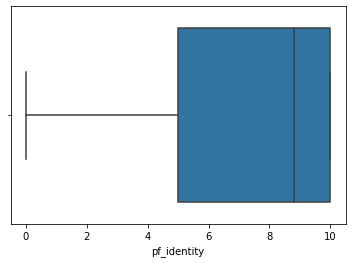

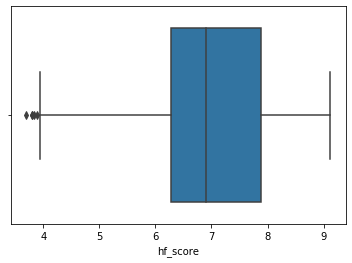

In [160]:
# 6)    ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
#       Los datos atipos se toman, en base entre 2 o 3 desviaciones standares, todos los valores de que caen fuera de esa rango los consideramos valores atipicos
#       No se eliminarian del conjunto de datos, por que siguen siendo valores que represantan la realidad de un pais y se lo estaria excluyendo del analisis
#       Si se eliminarian para la estimacion de una funcion de distribucion 

# Imprimimos los valores atipicos detectados con el metodo anterior
amount_of_std_dev          = 2.5
outliers_pf_identity_world = dataset[abs(dataset.pf_identity - mean_pf_indentity_world) >= (amount_of_std_dev * std_dev_pf_indentity_world)]
outliers_hf_score_world    = dataset[abs(dataset.hf_score    - mean_hf_score_world    ) >= (amount_of_std_dev * std_dev_hf_score_world    )]

print ( '*** outliers_pf_identity_world ***' )
print ( outliers_pf_identity_world.countries ) if not outliers_pf_identity_world.countries.empty else print('No hay outliers tomando esas desviaciones estandars')
print ( '\n*** outliers_hf_score_world ***'  )
print ( outliers_hf_score_world.countries    ) if not outliers_hf_score_world.countries.empty else print('No hay outliers tomando esas desviaciones estandars')

# Y finalmente una representacion grafica
seaborn.boxplot(data=dataset, x='pf_identity')
plt.show()
seaborn.boxplot(data=dataset, x='hf_score')
plt.show()

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

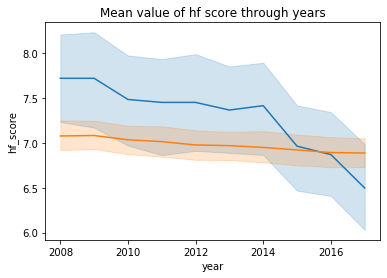

In [137]:
# 1) Graficamos los variables a lo largo de los anios
plt.figure()
plt.title('Mean value of pf identity through years')
seaborn.lineplot(data = dataset, x = 'year', y = 'pf_identity')
plt.figure()
plt.title('Mean value of hf score through years')
seaborn.lineplot(data = dataset, x = 'year', y = 'hf_score')
plt.show()

In [ ]:
#2) Hacemos lo mismo pero dividiendo en regiones
for region in dataset.region.unique():
    region_dataset = dataset[dataset.region == region]
    plt.figure()
    plt.title("Mean "+ region + " value pf_identity across the years")
    seaborn.barplot(data=region_dataset, x='year', y='pf_identity')
    plt.figure()
    plt.title("Mean "+ region + " value hf_score across the years")
    seaborn.barplot(data=region_dataset, x='year', y='hf_score')

plt.show()
# En la gran mayoria de los casos se observa una tendencia a la dimsunicion del promedio a lo largo de los anios
# Es lo que se observa si no se divide por regiones

[ nan 136.  98.  93.  91.  90.  88.  83.  77.  72.  71.  70.  69.  67.
  65.  59.  58.  56.  55.  50.  48.  41.  39.  37.  30.]
67.0
['Venezuela', 'Dominican Rep.', 'Argentina', 'Honduras', 'Jamaica', 'Bahamas', 'Chile']


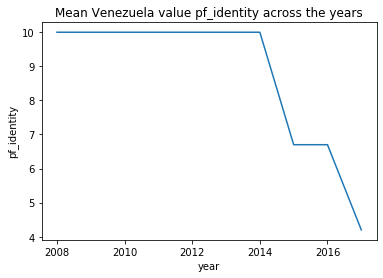

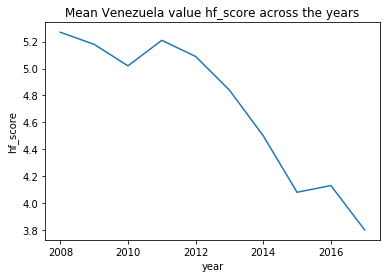

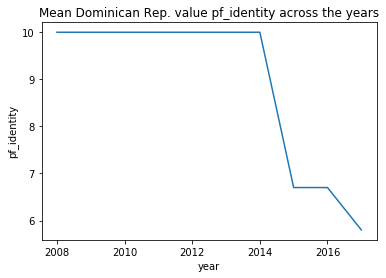

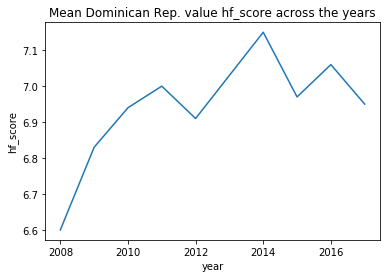

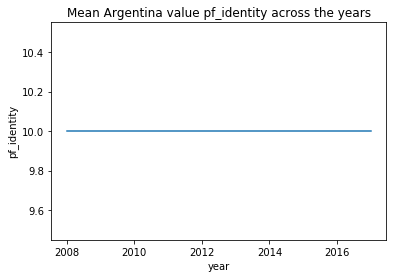

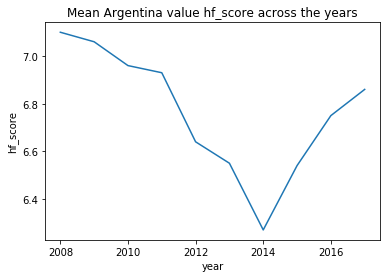

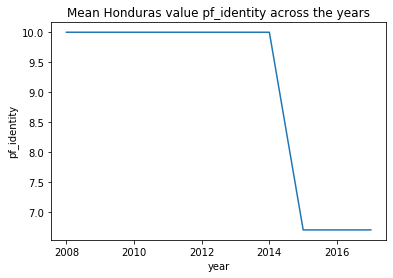

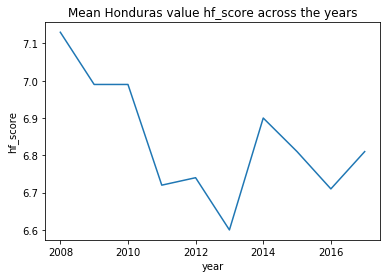

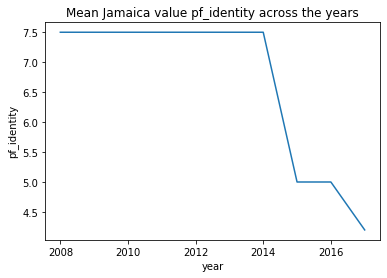

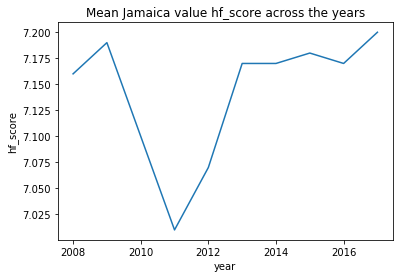

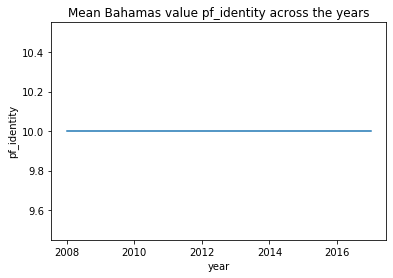

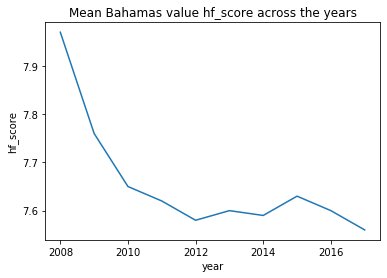

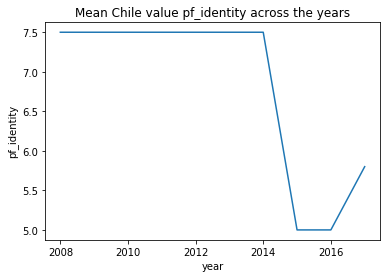

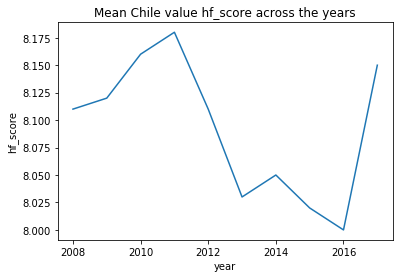

In [138]:
# 3) Graficamos lo largo de los anios 6 paises de latinoamerica, ordenandolos en el ranking, vamos a tomar los 2 de abajo, los 3 del medio y los 2 de arriba
# tomando como referencia el ranking the 2008, para ver como vario cada pais
selected_region = dataset[dataset.region == 'Latin America & the Caribbean']
selected_year   = selected_region[selected_region.year == 2008]

# Going to see some rank values to be used
print (selected_year.hf_rank.unique())
print (selected_year.hf_rank.median())
selected_ranks = [136, 98, 69, 67, 65, 37, 30]

# Now we select the countries
selected_countries = []
for rank in selected_ranks:
    selected_countries.append(selected_year[selected_year.hf_rank == rank].countries.values[0])
    
print(selected_countries)

# Finalmente los graficos
for country in selected_countries:
    country_dataset = dataset[dataset.countries == country]
    plt.figure()
    plt.title("Mean "+ country + " value pf_identity across the years")
    seaborn.lineplot(data=country_dataset, x='year', y='pf_identity')
    plt.figure()
    plt.title("Mean "+ country + " value hf_score across the years")
    seaborn.lineplot(data=country_dataset, x='year', y='hf_score')

plt.show()
# Se observa una tendencia dispar, algunos paises tienden a mostrar una tendencia negativa, como el caso de venezuela
# Otros mantienen los valores a lo largo de los anios, mientras que otros tienden a mostrar valores mas altos
# no podemos decir con certeza que este subset de paises seleccionados siguen la tendencia general decreciente.

In [ ]:
# Curiosidad graficar el hf_score y el ef_score
plt.figure()
plt.title('Mean value of hf_score through years')
seaborn.barplot(data = dataset, x = 'year', y = 'hf_score')
plt.figure()
plt.title('Mean value of ef_score through years')
seaborn.barplot(data = dataset, x = 'year', y = 'ef_score')

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


In [ ]:
latam  = dataset[dataset.region == 'Latin America & the Caribbean']
plt.figure()
plt.title("pf_identity in latam and world")
seaborn.distplot(latam.pf_identity.dropna(), label ="latam")
seaborn.distplot(dataset.pf_identity.dropna(), label ='world')

plt.figure()
plt.title("hf_score in latam and world")
seaborn.distplot(latam.hf_score.dropna(), label='latam')
seaborn.distplot(dataset.hf_score.dropna(), label='world')

# En cuanto a la distribucion, para el caso de pf_identity la densidad esta centrada en el valor maximo
# Parace que es una distribucion asimetrica a izquierda, no eliminaria los puntajes mas bajos, el acumulado capaz supera el 25% de probablidad 
# Para el caso de hf_score quisiera decir que es normmal en un caso, en el otro no estamos seguros, la suma de 2 normales con distinto centro ?

#### 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



In [ ]:
# 1) Graficamos el pair plot de cada una de las variables.
seaborn.pairplot(data=dataset, vars=['pf_identity','pf_score','ef_score'])

# Podemos ver que ef_score y pf_score paracen estar relacionadas el pairplot entre ellas parace ser el mismo grafico, espejado de una forma forma extrana
# el pf_identity tiene una distribucion de densidad extrana, muchas realizaciones sobre un mismo valor.

In [ ]:
#2) Graficar la correlacion visual... 
seaborn.regplot(data=dataset, x='pf_identity', y='pf_score')
plt.ylabel('pf_score')
plt.xlabel('pf_identity')
plt.title ('Graphic correlation between pf_identity and pf_score')
plt.show()
seaborn.regplot(data=dataset, x='pf_identity', y='ef_score')
plt.ylabel('ef_score')
plt.xlabel('pf_identity')
plt.title ('Graphic correlation between pf_identity and ef_score')

# Lo que se observa en el primer grafico es que existe una correlacion positiva, lo que implicaria que si una variable crece la otra tambien
# es consistente con el hecho de pf_identity contribuye con el calculo de pf_score
# En el segundo grafico, la tendencia es positiva, pero levemente, indica un grado de correlacion mas bajo entre estas 2 variables.

In [ ]:
# 3) Convertir las variables en categoricas
# El criterio utilizado para dividir las categorias es utilizar los valores min y max como los extremos
# Y luego en el medio los cuartiles, de 25% y 75%, si sucede que algun cuartil coincide con el valor
# maximo o minimo, se adopta la mediana en su lugar.

ranges          = [0,0,0,0]
labels          = ['low', 'medium', 'high']

# For pf_identity
ranges[0]       = dataset.pf_identity.min     () - 0.1
ranges[1]       = dataset.pf_identity.quantile(0.25)  
ranges[2]       = dataset.pf_identity.quantile(0.50)   # This is because the quantile 0.75 and max are the same
ranges[3]       = dataset.pf_identity.max     () + 0.1
pf_identity_segment = pandas.cut(dataset.pf_identity, ranges, right=False, labels=labels)

# For ef_score
ranges[0]       = dataset.ef_score.min     () - 0.1
ranges[1]       = dataset.ef_score.quantile(0.25)
ranges[2]       = dataset.ef_score.quantile(0.75)
ranges[3]       = dataset.ef_score.max     () + 0.1
ef_score_segment = pandas.cut(dataset.ef_score, ranges, right=False, labels=labels)

# For pf_score
ranges[0]       = dataset.pf_score.min     () - 0.1
ranges[1]       = dataset.pf_score.quantile(0.25)
ranges[2]       = dataset.pf_score.quantile(0.75)
ranges[3]       = dataset.pf_score.max     () + 0.1
pf_score_segment = pandas.cut(dataset.pf_score, ranges, right=False, labels=labels)

In [ ]:
# 4) Graficar la correlacion visual
cross = pandas.crosstab(pf_identity_segment, ef_score_segment)
seaborn.heatmap(cross)
plt.show()
cross = pandas.crosstab(pf_identity_segment, pf_score_segment)
seaborn.heatmap(cross)
plt.show()
cross = pandas.crosstab(pf_score_segment, ef_score_segment)
seaborn.heatmap(cross)

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?